# In-Depth Analysis and Machine Learning

First we will evaluate several supervised machine learning techniques with default hyperparameters. Then we will perform hyperparameter tuning on the best peforming default estimators.

Classifiers: Random Forest, Support Vector Machines, Naive Bayes, K-Nearest Neighbor, XGBoost

Model Evaluation Metrics: accuracy and f1-score


In [135]:
import pandas as pd
import numpy as np

In [136]:
df = pd.read_csv('data/final_spotify_data.csv')

In [137]:
df = df.drop_duplicates(subset='id', keep='first') # remove duplicate songs

In [138]:
print(df.info())
print(len(df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2148
Data columns (total 17 columns):
id                  2117 non-null object
name                2117 non-null object
uri_x               2117 non-null object
acousticness        2117 non-null float64
danceability        2117 non-null float64
duration_ms         2117 non-null int64
energy              2117 non-null float64
instrumentalness    2117 non-null float64
key                 2117 non-null int64
liveness            2117 non-null float64
loudness            2117 non-null float64
mode                2117 non-null int64
speechiness         2117 non-null float64
tempo               2117 non-null float64
time_signature      2117 non-null int64
valence             2117 non-null float64
playlist            2117 non-null object
dtypes: float64(9), int64(4), object(4)
memory usage: 297.7+ KB
None
2117


In [139]:
df.groupby('playlist').nunique()

,id,name,uri_x,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,playlist
playlist,,,,,,,,,,,,,,,,,
chill,536,524,536,426,352,528,374,451,12,259,518,2,294,527,4,395,1
focus,525,516,525,325,383,514,439,265,12,258,518,2,322,519,4,410,1
party,533,519,533,454,318,526,343,300,12,364,515,2,403,524,4,394,1
workout,523,516,523,476,342,518,325,366,12,345,501,2,392,514,4,390,1


In [140]:
## FIRST NEED TO PUT GENRES INTO NUMERICAL CLASSES

g = ['workout', 'chill', 'party', 'focus']

df['labels'] = df['playlist']

d = dict(zip(g, range(0,4)))

df['labels'] = df['labels'].map(d, na_action='ignore')


In [141]:
df.groupby('labels').nunique()

,id,name,uri_x,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,playlist,labels
labels,,,,,,,,,,,,,,,,,,
0,523,516,523,476,342,518,325,366,12,345,501,2,392,514,4,390,1,1
1,536,524,536,426,352,528,374,451,12,259,518,2,294,527,4,395,1,1
2,533,519,533,454,318,526,343,300,12,364,515,2,403,524,4,394,1,1
3,525,516,525,325,383,514,439,265,12,258,518,2,322,519,4,410,1,1


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
## SPLIT INTO TRAINING AND TEST

X = df.drop(['labels', 'playlist','id','name','uri_x'], axis = 1)
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)
### STANDARD PARAMETERS ###
rfclf = RandomForestClassifier()
rfclf.fit(X_train_scaled, y_train)

y_pred = rfclf.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print("\n Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy:", (accuracy_score(y_test,y_pred)))



 Confusion Matrix:
 [[113   8  59   1]
 [ 12 145   6  15]
 [ 60   6 104   1]
 [ 10  14   1 144]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.62      0.60       181
           1       0.84      0.81      0.83       178
           2       0.61      0.61      0.61       171
           3       0.89      0.85      0.87       169

   micro avg       0.72      0.72      0.72       699
   macro avg       0.73      0.72      0.73       699
weighted avg       0.73      0.72      0.73       699

Accuracy: 0.7238912732474965


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Support Vector Machine

In [145]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf = svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)
  

print('\n Confusion Matrix:\n',confusion_matrix(y_test,svm_pred))
print("\n Classification Report: \n", classification_report(y_test, svm_pred))
print("Accuracy:", (accuracy_score(y_test,svm_pred)))


 Confusion Matrix:
 [[101   7  70   3]
 [  8 136  16  18]
 [ 50   3 116   2]
 [  5  12   6 146]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.56      0.59       181
           1       0.86      0.76      0.81       178
           2       0.56      0.68      0.61       171
           3       0.86      0.86      0.86       169

   micro avg       0.71      0.71      0.71       699
   macro avg       0.72      0.72      0.72       699
weighted avg       0.72      0.71      0.72       699

Accuracy: 0.7138769670958512


### Naive Bayes

In [146]:
# naive bayes

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train_scaled, y_train) 
gnb_predictions = gnb.predict(X_test_scaled) 
  

print('\n Confusion Matrix:\n',confusion_matrix(y_test,gnb_predictions))
print("\n Classification Report: \n", classification_report(y_test, gnb_predictions))
print("Accuracy:", (accuracy_score(y_test, gnb_predictions)))


 Confusion Matrix:
 [[111   7  58   5]
 [ 13 129  19  17]
 [ 59   4 107   1]
 [ 20  21   4 124]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.61      0.58       181
           1       0.80      0.72      0.76       178
           2       0.57      0.63      0.60       171
           3       0.84      0.73      0.78       169

   micro avg       0.67      0.67      0.67       699
   macro avg       0.69      0.67      0.68       699
weighted avg       0.69      0.67      0.68       699

Accuracy: 0.6738197424892703


### KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

Knnclf = KNeighborsClassifier(n_neighbors=3)
Knnclf.fit(X_train_scaled, y_train)

knn_predictions = Knnclf.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,knn_predictions))
print("\n Classification Report: \n", classification_report(y_test, knn_predictions))
print("Accuracy:", (accuracy_score(y_test, knn_predictions)))


 Confusion Matrix:
 [[111   8  62   0]
 [ 22 132  13  11]
 [ 76   7  86   2]
 [ 10  14   6 139]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.61      0.55       181
           1       0.82      0.74      0.78       178
           2       0.51      0.50      0.51       171
           3       0.91      0.82      0.87       169

   micro avg       0.67      0.67      0.67       699
   macro avg       0.69      0.67      0.68       699
weighted avg       0.69      0.67      0.68       699

Accuracy: 0.6695278969957081


### XGBOOST

In [148]:
#XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,xgb_pred))
print("\n Classification Report: \n", classification_report(y_test, xgb_pred))
print("Accuracy:", (accuracy_score(y_test,xgb_pred)))




 Confusion Matrix:
 [[107  11  61   2]
 [ 11 143  11  13]
 [ 55   8 108   0]
 [  6  11   3 149]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.59      0.59       181
           1       0.83      0.80      0.81       178
           2       0.59      0.63      0.61       171
           3       0.91      0.88      0.89       169

   micro avg       0.73      0.73      0.73       699
   macro avg       0.73      0.73      0.73       699
weighted avg       0.73      0.73      0.73       699

Accuracy: 0.7253218884120172


### Default Estimators Accuracy Scores

In [149]:
print("Random Forest:", "%.2f%%" %(accuracy_score(y_test,y_pred)*100))
print("SVM:", "%.2f%%" %(accuracy_score(y_test,svm_pred)*100))
print("Naive Bayes:", "%.2f%%" %(accuracy_score(y_test,gnb_predictions)*100))
print("KNN:", "%.2f%%" %(accuracy_score(y_test,knn_predictions)*100))
print("XGBoost:", "%.2f%%" %(accuracy_score(y_test,xgb_pred)*100))

Random Forest: 72.39%
SVM: 71.39%
Naive Bayes: 67.38%
KNN: 66.95%
XGBoost: 72.53%


Random Forest, SVM and XGBoost models had the best performance with their default hyperparameters. Now let's tune these models.

## Hyperparameter Tuning

Now we will find optimal hyperparameters by using a grid search method. This method searches through a grid of parameters for each model, returning the parameters that give the highest k-fold cross validation score.

### Tuned XGBoost


We tune max_depth and min_child_weight first, as they will have the highest impact on model outcome. These parameters can be used to control the complexity of the trees. 

Use random search instead of grid search. Grid search has proven to be too exhaustive for extensive parameter grids. Random Search is more efficient in this case. Cross validation is used to evaluate the training data.

In [150]:
# evaluate base model
cross_val_scores= cross_val_score(xgb, X_train_scaled, y_train, \
                                  cv=5, scoring="accuracy")*100

print("Average Cross-Validation Score: %.2f%%" % np.mean(cross_val_scores))

Average Cross-Validation Score: 74.33%


In [151]:
param_grid1 = {"max_depth"        : [1, 2, 3, 4, 5, 6, 8],
               "min_child_weight" : [ 1, 2, 3, 4, 5, 6] }


In [154]:
# tune XGBoost

from sklearn.model_selection import RandomizedSearchCV

gs_random = RandomizedSearchCV(XGBClassifier(), param_grid1, cv= 5,n_iter=100)

gs_random.fit(X_train_scaled, y_train)
gs_pred = gs_random.predict(X_train_scaled)
print(gs_random.best_params_, gs_random.best_score_)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'min_child_weight': 1, 'max_depth': 6} 0.7496473906911142


In [155]:
param_grid2 = {"gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

gs_random2 = RandomizedSearchCV(XGBClassifier(min_child_weight= 1, max_depth= 6), param_grid2, cv= 5,n_iter=100)

gs_random2.fit(X_train_scaled, y_train)
print(gs_random2.best_params_, gs_random2.best_score_)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'gamma': 0} 0.7496473906911142


In [156]:
param_grid3 = {"colsample_bytree" : [ 0.6 , 0.7, 0.8, 1.0],
               "subsample" : [ 0.6 , 0.7, 0.8, 1.0]}

In [157]:
gs_random3 = RandomizedSearchCV(XGBClassifier(min_child_weight= 1, max_depth= 6, gamma=0), param_grid3, cv= 5,n_iter=100)

gs_random3.fit(X_train_scaled, y_train)
print(gs_random3.best_params_, gs_random3.best_score_)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'subsample': 1.0, 'colsample_bytree': 1.0} 0.7496473906911142


In [158]:
param_grid4 = {"subsample" : [0.85, 0.9, 1.0],
               "colsample_bytree" : [0.85, 0.9, 1.0]}

In [159]:
gs_random4 = RandomizedSearchCV(XGBClassifier(min_child_weight= 1, max_depth= 6, gamma=0, subsample=1.0, colsample_bytree=1.0), param_grid4, cv= 5,n_iter=100)

gs_random4.fit(X_train_scaled, y_train)
print(gs_random4.best_params_, gs_random4.best_score_)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'subsample': 0.85, 'colsample_bytree': 0.85} 0.7503526093088858


In [160]:
param_grid5 = {"learning_rate" : [0.1,0.05,.01],
               "n_estimators" : [100,500,1000]}
gs_random5 = RandomizedSearchCV(XGBClassifier(min_child_weight= 1, max_depth= 6, gamma=0, subsample=0.85, colsample_bytree=0.85), param_grid5, cv= 5,n_iter=100)

gs_random5.fit(X_train_scaled, y_train)
print(gs_random5.best_params_, gs_random5.best_score_)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 100, 'learning_rate': 0.1} 0.7503526093088858


Now we gradually decrease learning rate while increasing the number of trees until we reach an optimal score.

In [161]:
xgb_tuned = XGBClassifier(
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 learning_rate=0.1,
n_estimators=100)

xgb_tuned.fit(X_train_scaled, y_train)

cross_val_scores= cross_val_score(xgb_tuned, X_train_scaled, y_train, \
                                  cv=5, scoring="accuracy")*100

print("Average Cross-Validation Score: %.4f%%" % np.mean(cross_val_scores))

Average Cross-Validation Score: 75.0284%


The tuned hyperparameters increase CV performance by 0.7%. Now lets evaluate the tuned model on our test set.

In [162]:
# evaluate hold out set

xgb_pred2 = xgb_tuned.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,xgb_pred2))
print("\n Classification Report: \n", classification_report(y_test, xgb_pred2))
print("Accuracy:", (accuracy_score(y_test,xgb_pred2)))
print(xgb_tuned.get_params)


 Confusion Matrix:
 [[104  10  65   2]
 [ 11 142  11  14]
 [ 51   5 115   0]
 [  3  11   4 151]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.57      0.59       181
           1       0.85      0.80      0.82       178
           2       0.59      0.67      0.63       171
           3       0.90      0.89      0.90       169

   micro avg       0.73      0.73      0.73       699
   macro avg       0.74      0.73      0.74       699
weighted avg       0.74      0.73      0.73       699

Accuracy: 0.7324749642346209
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=Tru

When evaluating the hyperparameters on our test set, we find that the accuracy score is lower than our inital model. The weighted F-score is the same as our inital model. If you look at the F-scores for each class and the confusion matrices, you can see that this model is more accurate in predicting class '0' (workout). Our inital model is more accurate in predicting class '1' (party). Since predicting one class more accurately than another in this case is not relevant, we choose the model with the highest accuracy. This model is the default XGBoost estimator.

Tuning the hyperparameters for XGBoost is not improving our scores. However, since it is still our highest score, I will see if I have improve the model by implementing feature selection. 

#### Feature Importance and Selection

We will use Feature importance scores for feature selection.

In [163]:
print(X.columns)

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


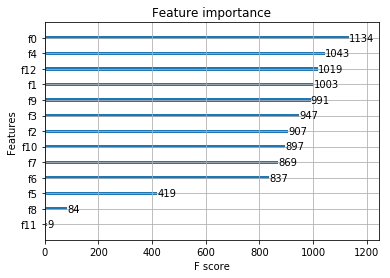

In [164]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb_tuned)
plt.show()

In [165]:
print(xgb_tuned.feature_importances_)

[0.10878567 0.05987058 0.05619697 0.09955791 0.23149806 0.03641569
 0.03970172 0.11424374 0.04676833 0.06963248 0.04506895 0.00780199
 0.084458  ]


From an article, I found a code that uses the SelectFromModel class to test multiple thresholds for selecting features by feature importance. It allows us to test each subset of features by importance, starting with all features and ending with a subset with the most important feature.

In [166]:
#adapted from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb_tuned.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_tuned, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_scaled)
    # train model
    selection_model = XGBClassifier(max_depth=6,min_child_weight=1,
                                    gamma=0,subsample=0.85,colsample_bytree=0.85,
                                    learning_rate=0.1,n_estimators=100)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test_scaled)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.4f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.0078, n=13, Accuracy: 73.25%
Thresh=0.0364, n=12, Accuracy: 72.82%
Thresh=0.0397, n=11, Accuracy: 72.53%
Thresh=0.0451, n=10, Accuracy: 73.10%
Thresh=0.0468, n=9, Accuracy: 71.96%
Thresh=0.0562, n=8, Accuracy: 71.82%
Thresh=0.0599, n=7, Accuracy: 71.10%
Thresh=0.0696, n=6, Accuracy: 68.81%
Thresh=0.0845, n=5, Accuracy: 70.82%
Thresh=0.0996, n=4, Accuracy: 63.81%
Thresh=0.1088, n=3, Accuracy: 64.66%
Thresh=0.1142, n=2, Accuracy: 59.94%
Thresh=0.2315, n=1, Accuracy: 48.35%


Optimal threshold is using all features. 


[Text(0, 0.5, 'workout'),
 Text(0, 1.5, 'chill'),
 Text(0, 2.5, 'party'),
 Text(0, 3.5, 'focus')]

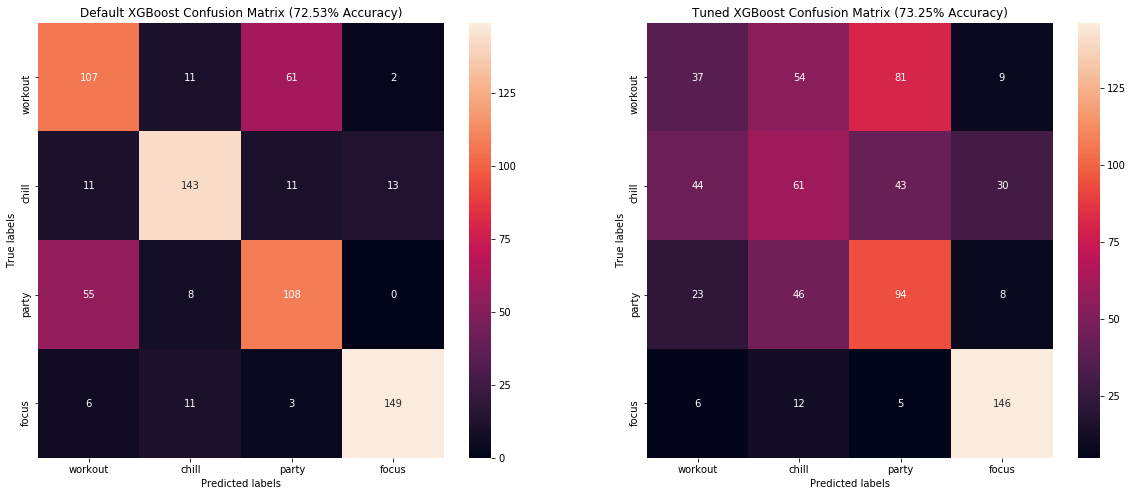

In [167]:
import seaborn as sns

fig = plt.figure(figsize = (20,8))

ax= fig.add_subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Default XGBoost Confusion Matrix (72.53% Accuracy)'); 
ax.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

ax2= fig.add_subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax2, fmt='g'); 

# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Tuned XGBoost Confusion Matrix (73.25% Accuracy)'); 
ax2.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax2.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])

XGBoost is our best performing model at 73.25% accuracy. 

Notice that the scores for class '0' (workout) and class '2' (party) are consistently lower than the other classes for all our models. From the confusion matrix, you can tell that the workout and party class scores are low because our estimators often 'confuse' the two. For true labels of party, the model predicted workout 67 times. For true labels of workout, our estimator predicted party 42 times. This is not a shock since during our EDA, we found that workout and party distributions were very similar. 

### Ensembling

Since our model is confusing classes 0 and 2 quite frequently, we will implement ensembling to build on our classfier. We will first train a model to only classify between workout and party songs. Then we will combine this model with our previous model to see if it improves performance. We start with Random Forest since it had the next best performance of our base models.

In [168]:
# random forest with just workout and party
# combine train X and Y so we can extract only 0 and 2 classes
df_train =pd.DataFrame(data=X_train_scaled, index=y_train.index)  

df_train['label'] = y_train

# remove any rows with label of 1 or 3 so we can train our sub model
df_train_bi = df_train[(df_train.label != 1) & (df_train.label != 3)]

# split back to X and y
X_df_train = df_train_bi.drop(['label'], axis = 1)
y_df_train = df_train_bi['label']

rfclf_new = RandomForestClassifier()
rfclf_new.fit(X_df_train, y_df_train)


cross_val_scores= cross_val_score(rfclf_new, X_df_train, y_df_train, \
                                  cv=5, scoring="accuracy")*100

print("Average Cross-Validation Score: %.2f%%" % np.mean(cross_val_scores))

Average Cross-Validation Score: 66.89%


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now lets tune our parameters using Randomized Grid Search.

In [169]:
# combine test X and Y so we can extract only 0 and 2 classes
df_test =pd.DataFrame(data=X_test_scaled, index=y_test.index)  

df_test['label'] = y_test

# remove any rows with label of 1 or 3 so we can train our sub model
df_test_bi = df_test[(df_test.label != 1) & (df_test.label != 3)]

# split back to X and y
X_df_test = df_test_bi.drop(['label'], axis = 1)
y_df_test = df_test_bi['label']

In [170]:
param_grid_new ={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [3, 4, 5, 7],
 'min_samples_split': [8, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [171]:
## tune smaller dataset
cv_new = RandomizedSearchCV(rfclf_new, param_grid_new, cv=5)
cv_new.fit(X_df_train, y_df_train)
print(cv_new.best_params_, cv_new.best_score_)

c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True} 0.7215909090909091


In [172]:
rfclf_tuned_new = cv_new.best_estimator_
rfclf_tuned_new.fit(X_df_train, y_df_train)

rfclf_pred_new = rfclf_tuned_new.predict(X_df_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_df_test,rfclf_pred_new))
print("\n Classification Report: \n", classification_report(y_df_test, rfclf_pred_new))                                                
print("Accuracy:", (accuracy_score(y_df_test,rfclf_pred_new)))


 Confusion Matrix:
 [[115  66]
 [ 56 115]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       181
           2       0.64      0.67      0.65       171

   micro avg       0.65      0.65      0.65       352
   macro avg       0.65      0.65      0.65       352
weighted avg       0.65      0.65      0.65       352

Accuracy: 0.6534090909090909


Now we will train another model (SVM) on the two classes.

In [173]:
svmclf = SVC(probability=True,kernel='rbf')
svmclf = svmclf.fit(X_df_train, y_df_train)
svm_pred = svmclf.predict(X_df_test)
  

print('\n Confusion Matrix:\n',confusion_matrix(y_df_test,svm_pred))
print("\n Classification Report: \n", classification_report(y_df_test, svm_pred))
print("Accuracy:", (accuracy_score(y_df_test,svm_pred)))


 Confusion Matrix:
 [[105  76]
 [ 50 121]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.58      0.62       181
           2       0.61      0.71      0.66       171

   micro avg       0.64      0.64      0.64       352
   macro avg       0.65      0.64      0.64       352
weighted avg       0.65      0.64      0.64       352

Accuracy: 0.6420454545454546


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Again, use random search to tune the hyperparameters.

In [174]:
tuned_parameters = {'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
svm_cv = RandomizedSearchCV(svmclf, tuned_parameters, cv=5)
svm_cv.fit(X_df_train, y_df_train)
print(svm_cv.best_params_, svm_cv.best_score_)


{'gamma': 0.001, 'C': 25} 0.6747159090909091


In [175]:
svmclf_tuned = svm_cv.best_estimator_
svmclf_tuned.fit(X_df_train, y_df_train)

svmclf_tuned_pred = svmclf_tuned.predict(X_df_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_df_test,svmclf_tuned_pred))
print("\n Classification Report: \n", classification_report(y_df_test, svmclf_tuned_pred))                                                
print("Accuracy:", (accuracy_score(y_df_test,svmclf_tuned_pred)))


 Confusion Matrix:
 [[112  69]
 [ 60 111]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.62      0.63       181
           2       0.62      0.65      0.63       171

   micro avg       0.63      0.63      0.63       352
   macro avg       0.63      0.63      0.63       352
weighted avg       0.63      0.63      0.63       352

Accuracy: 0.6335227272727273


Now we ensemble our three models. To do this we take the predicted probabilities and average them for classes of 0 and 2.

In [176]:
# get probabilties of XGBoost multiclass model
x = xgb_tuned.predict_proba(X_test_scaled)

# get probabilities of random forest binary classifier
r = rfclf_tuned_new.predict_proba(X_df_test)

# get probabilities of SVM binary classifier
s = svmclf.predict_proba(X_df_test)

In [177]:
#add index to probabilities so we can merge
x = pd.DataFrame(data=x, index=df_test.index)
r = pd.DataFrame(data=r, index=df_test_bi.index)
s = pd.DataFrame(data=s, index=df_test_bi.index)

In [178]:
# build a dataframe of probabilities (averaged for class 0 and 2)
P = pd.DataFrame(index=df_test.index)
for i in P.index:
    try:
        P.loc[i,0] = (x.loc[i,0] + r.loc[i,0] + s.loc[i,0])/3
        P.loc[i,1] = x.loc[i,1]
        P.loc[i,2] = (x.loc[i,2] + r.loc[i,1] + s.loc[i,1])/3
        P.loc[i,3] = x.loc[i,3]
    except KeyError:
        P.loc[i,:] = x.loc[i,:]
   

In [179]:
# label predictions
pred = []
for i in P.index:
    for column in P:
        if P.loc[i,column] == max(P.loc[i,:].values):
           pred.append(column)

In [180]:
print('\n Confusion Matrix:\n',confusion_matrix(y_test,pred))
print("\n Classification Report: \n", classification_report(y_test, pred))
print("Accuracy:", (accuracy_score(y_test,pred)))


 Confusion Matrix:
 [[111   7  61   2]
 [ 11 142  11  14]
 [ 51   4 116   0]
 [  3  11   4 151]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62       181
           1       0.87      0.80      0.83       178
           2       0.60      0.68      0.64       171
           3       0.90      0.89      0.90       169

   micro avg       0.74      0.74      0.74       699
   macro avg       0.75      0.75      0.75       699
weighted avg       0.75      0.74      0.75       699

Accuracy: 0.7439198855507868


[Text(0, 0.5, 'workout'),
 Text(0, 1.5, 'chill'),
 Text(0, 2.5, 'party'),
 Text(0, 3.5, 'focus')]

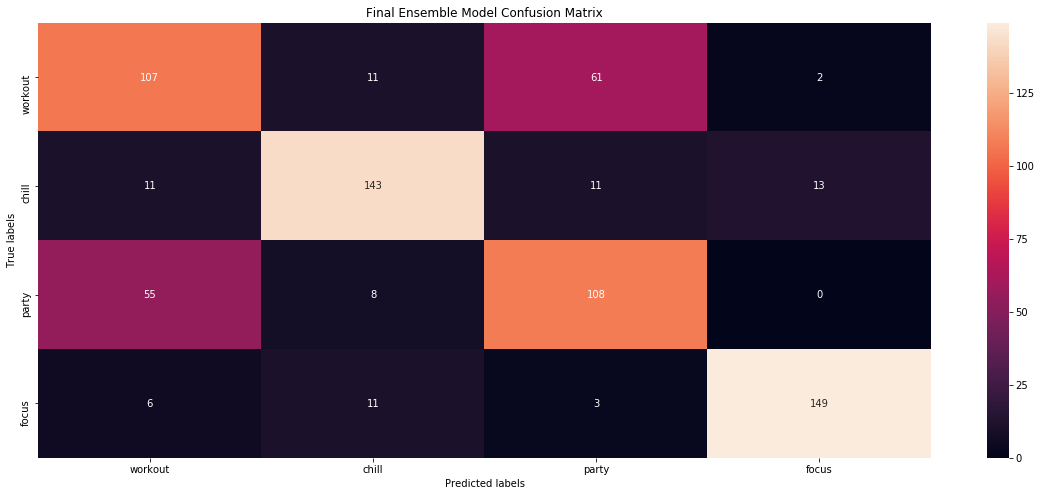

In [185]:
fig3 = plt.figure(figsize = (20,8))

ax3= fig3.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, ax = ax3, fmt='g'); 

# labels, title and ticks
ax3.set_xlabel('Predicted labels');ax3.set_ylabel('True labels'); 
ax3.set_title('Final Ensemble Model Confusion Matrix'); 
ax3.xaxis.set_ticklabels(['workout', 'chill', 'party', 'focus']); ax3.yaxis.set_ticklabels(['workout', 'chill', 'party', 'focus'])


Our accuracy score increased by 1.14% and our F1-Score increased by .02. Although our model did improve slightly, we still see error in predicting workout and party classes. 

This can be improved by adding more features to our dataset. Future recommendations include adding metadata of the song artist or gathering other sound metrics. Librosa is a package that can extract high and low level audio features from a song. However, this would require you have to each song file in your library.